# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [4]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_snapchat_1.csv")
df.head()

,userName,score,at,content
0,Faradila Eka,5,2024-07-27 05:24:21,Bagus
1,dian evos,5,2024-07-27 04:46:27,?????????????????????? H e l p m e ! USA
2,Fitri suci Ramadhani,1,2024-07-27 03:33:12,gimana caranya
3,Nadien Syakila,5,2024-07-27 01:37:57,Bagus banget
4,iklima,5,2024-07-26 20:42:27,oke ajasih


In [5]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Bagus
1,?????????????????????? H e l p m e ! USA
2,gimana caranya
3,Bagus banget
4,oke ajasih
...,...
1495,wah bagus banget suka deh👍
1496,Buruan download aplikasinya bagus banget
1497,Vielen Dank für Ihren Service 🙏🙏
1498,Good app 🥰


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()


,content
count,1500
unique,1247
top,Bagus
freq,50


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1500, 1)

In [9]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong

df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [13]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1247, 1)

In [14]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [15]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [16]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,content,cleaning
0,Bagus,bagus
1,?????????????????????? H e l p m e ! USA,h e l p m e usa
2,gimana caranya,gimana caranya
3,Bagus banget,bagus banget
4,oke ajasih,oke ajasih
...,...,...
1494,Aku suka sama ni apk selain lucu krna filter²n...,aku suka sama ni apk selain lucu krna filterny...
1495,wah bagus banget suka deh👍,wah bagus banget suka deh
1496,Buruan download aplikasinya bagus banget,buruan download aplikasinya bagus banget
1497,Vielen Dank für Ihren Service 🙏🙏,vielen dank fr ihren service


# **Normalization**

In [20]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "ratinh" : "rating",
        "bnaget" : "banget",
        "m a" : "",
        "h e l p m e usa" : "",
        "vielen dank fr ihren" : "",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Bagus,bagus,bagus
1,?????????????????????? H e l p m e ! USA,h e l p m e usa,
2,gimana caranya,gimana caranya,gimana caranya
3,Bagus banget,bagus banget,bagus banget
4,oke ajasih,oke ajasih,oke ajasih
...,...,...,...
1494,Aku suka sama ni apk selain lucu krna filter²n...,aku suka sama ni apk selain lucu krna filterny...,aku suka sama ni apk selain lucu krna filterny...
1495,wah bagus banget suka deh👍,wah bagus banget suka deh,wah bagus banget suka deh
1496,Buruan download aplikasinya bagus banget,buruan download aplikasinya bagus banget,buruan download aplikasinya bagus banget
1497,Vielen Dank für Ihren Service 🙏🙏,vielen dank fr ihren service,service


# **Stopwords**

In [21]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [22]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga", "suka", "karena", "banget", "hal", "dalam", "amat", "sudah"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Bagus,bagus,bagus,bagus
1,?????????????????????? H e l p m e ! USA,h e l p m e usa,,
2,gimana caranya,gimana caranya,gimana caranya,gimana caranya
3,Bagus banget,bagus banget,bagus banget,bagus
4,oke ajasih,oke ajasih,oke ajasih,oke ajasih
...,...,...,...,...
1494,Aku suka sama ni apk selain lucu krna filter²n...,aku suka sama ni apk selain lucu krna filterny...,aku suka sama ni apk selain lucu krna filterny...,suka sama ni apk selain lucu krna filternya ju...
1495,wah bagus banget suka deh👍,wah bagus banget suka deh,wah bagus banget suka deh,wah bagus suka deh
1496,Buruan download aplikasinya bagus banget,buruan download aplikasinya bagus banget,buruan download aplikasinya bagus banget,buruan download aplikasinya bagus
1497,Vielen Dank für Ihren Service 🙏🙏,vielen dank fr ihren service,service,service


# **Tokenize**

In [23]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Bagus,bagus,bagus,bagus,[bagus]
1,?????????????????????? H e l p m e ! USA,h e l p m e usa,,,[]
2,gimana caranya,gimana caranya,gimana caranya,gimana caranya,"[gimana, caranya]"
3,Bagus banget,bagus banget,bagus banget,bagus,[bagus]
4,oke ajasih,oke ajasih,oke ajasih,oke ajasih,"[oke, ajasih]"
...,...,...,...,...,...
1494,Aku suka sama ni apk selain lucu krna filter²n...,aku suka sama ni apk selain lucu krna filterny...,aku suka sama ni apk selain lucu krna filterny...,suka sama ni apk selain lucu krna filternya ju...,"[suka, sama, ni, apk, selain, lucu, krna, filt..."
1495,wah bagus banget suka deh👍,wah bagus banget suka deh,wah bagus banget suka deh,wah bagus suka deh,"[wah, bagus, suka, deh]"
1496,Buruan download aplikasinya bagus banget,buruan download aplikasinya bagus banget,buruan download aplikasinya bagus banget,buruan download aplikasinya bagus,"[buruan, download, aplikasinya, bagus]"
1497,Vielen Dank für Ihren Service 🙏🙏,vielen dank fr ihren service,service,service,[service]


# **Stemming**

In [24]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_snapchat_1.csv', index = False)


In [25]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_snapchat_1.csv', encoding = 'latin1')
df_steamming


,steamming
0,bagus
1,NaN
2,gimana cara
3,bagus
4,oke ajasih
...,...
1242,suka sama ni apk selain lucu krna filter juga ...
1243,wah bagus suka deh
1244,buru download aplikasi bagus
1245,service


# **Translate**

In [26]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadat

In [27]:
import pandas as pd
from easynmt import EasyNMT

In [29]:
# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_snapchat_1.csv', encoding = 'latin1')


In [30]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [31]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 4.35MB/s]                   


In [32]:
# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

<ipython-input-32-393f53f3cc1a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values = df_steamming.fillna(method = 'pad')


,steamming
0,bagus
1,bagus
2,gimana cara
3,bagus
4,oke ajasih
...,...
1242,suka sama ni apk selain lucu krna filter juga ...
1243,wah bagus suka deh
1244,buru download aplikasi bagus
1245,service


In [33]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_snapchat_1.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [34]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_snapchat_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,bagus,Good.
1,bagus,Good.
2,gimana cara,How?
3,bagus,Good.
4,oke ajasih,"It's okay, it's okay."
...,...,...
1242,suka sama ni apk selain lucu krna filter juga ...,like this apk other than cute because filter a...
1243,wah bagus suka deh,That's good. Love it.
1244,buru download aplikasi bagus,Hunt down the application download. Good.
1245,service,service


# **Labeling**

In [35]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_snapchat_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,bagus,Good.
1,bagus,Good.
2,gimana cara,How?
3,bagus,Good.
4,oke ajasih,"It's okay, it's okay."
...,...,...
1242,suka sama ni apk selain lucu krna filter juga ...,like this apk other than cute because filter a...
1243,wah bagus suka deh,That's good. Love it.
1244,buru download aplikasi bagus,Hunt down the application download. Good.
1245,service,service


In [36]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [37]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [38]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 690
Netral = 470
Negatif = 87

Total Data Seluruhnya : 1247


In [39]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,bagus,Good.,Positif
1,bagus,Good.,Positif
2,gimana cara,How?,Netral
3,bagus,Good.,Positif
4,oke ajasih,"It's okay, it's okay.",Positif
...,...,...,...
1242,suka sama ni apk selain lucu krna filter juga ...,like this apk other than cute because filter a...,Positif
1243,wah bagus suka deh,That's good. Love it.,Positif
1244,buru download aplikasi bagus,Hunt down the application download. Good.,Positif
1245,service,service,Netral


In [40]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



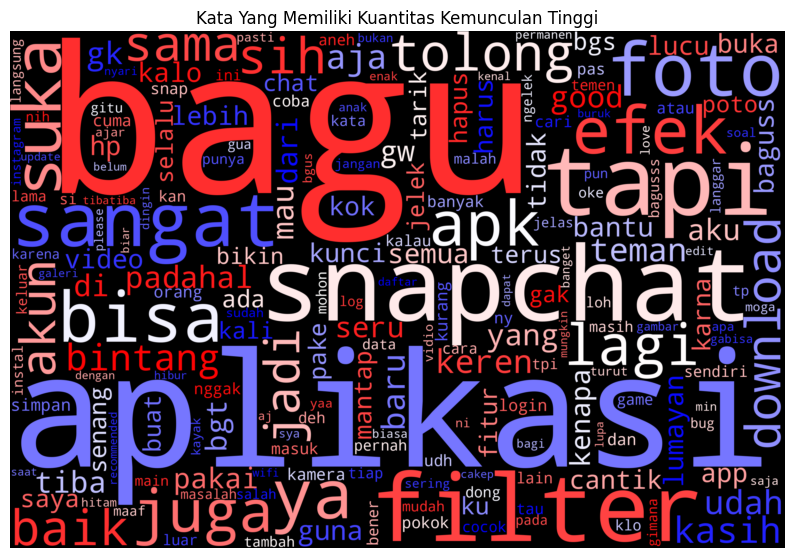

In [41]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

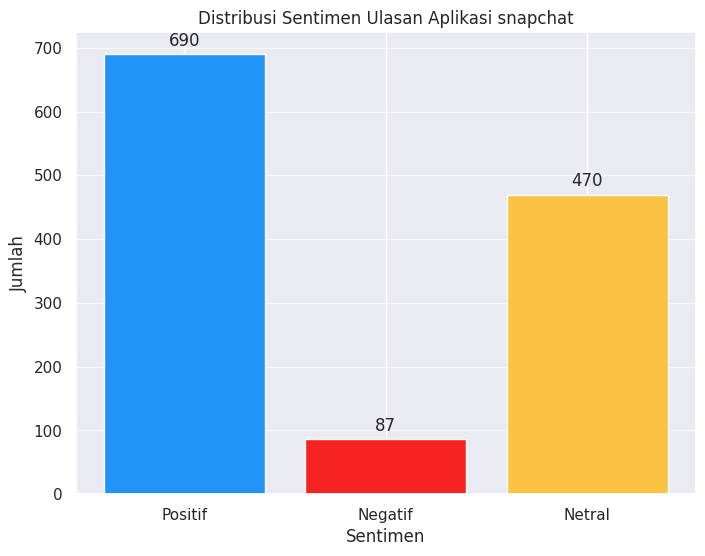

In [42]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi snapchat")

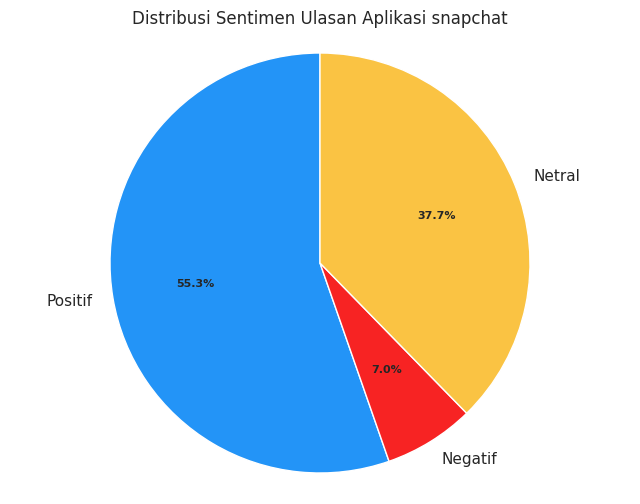

In [43]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi snapchat")

In [44]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,bagus,Good.,Positif
1,bagus,Good.,Positif
3,bagus,Good.,Positif
4,oke ajasih,"It's okay, it's okay.",Positif
7,aplikasi sangat bagus efek juga pada cantikluc...,The application is very good also the effect o...,Positif
...,...,...,...
1241,bagus mantep suka yang,Good. Keep liking that.,Positif
1242,suka sama ni apk selain lucu krna filter juga ...,like this apk other than cute because filter a...,Positif
1243,wah bagus suka deh,That's good. Love it.,Positif
1244,buru download aplikasi bagus,Hunt down the application download. Good.,Positif


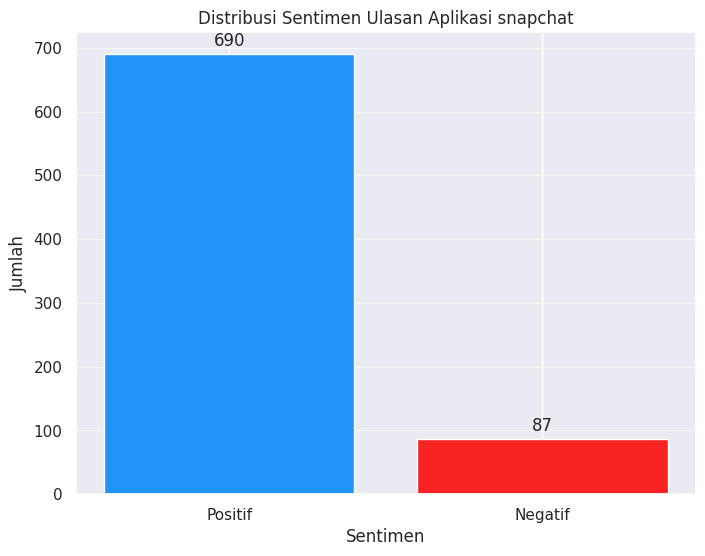

In [45]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi snapchat")

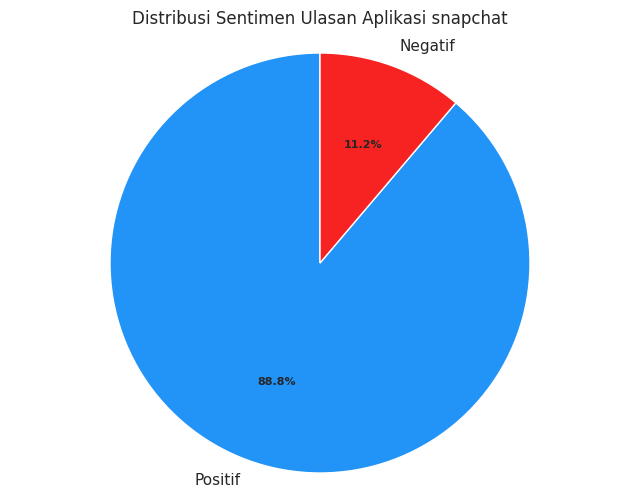

In [46]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi snapchat")

In [47]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,bagus,Good.,0
1,bagus,Good.,0
3,bagus,Good.,0
4,oke ajasih,"It's okay, it's okay.",0
7,aplikasi sangat bagus efek juga pada cantikluc...,The application is very good also the effect o...,0
...,...,...,...
1241,bagus mantep suka yang,Good. Keep liking that.,0
1242,suka sama ni apk selain lucu krna filter juga ...,like this apk other than cute because filter a...,0
1243,wah bagus suka deh,That's good. Love it.,0
1244,buru download aplikasi bagus,Hunt down the application download. Good.,0


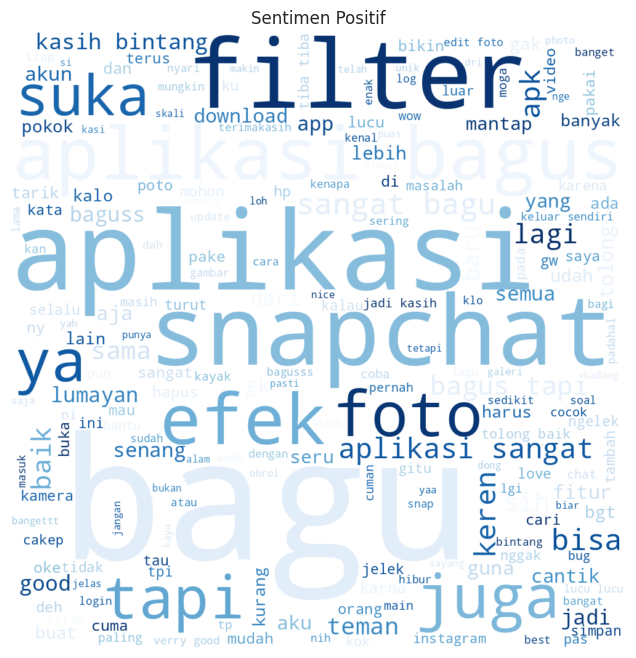

In [48]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

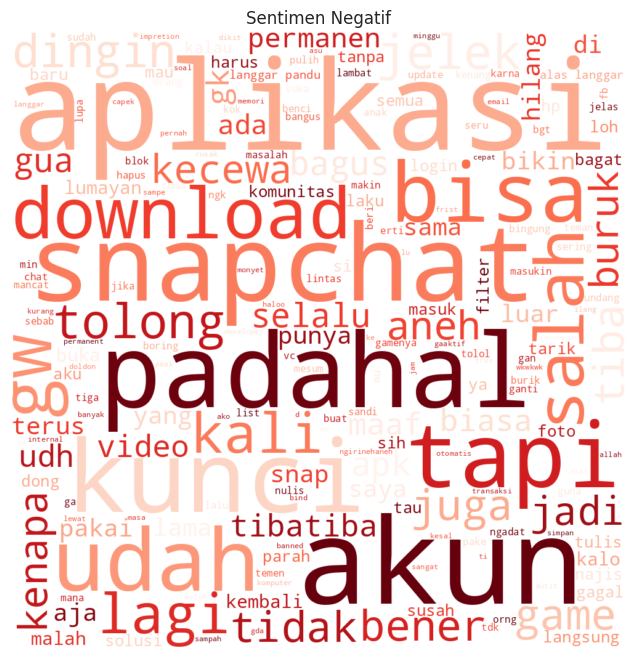

In [49]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

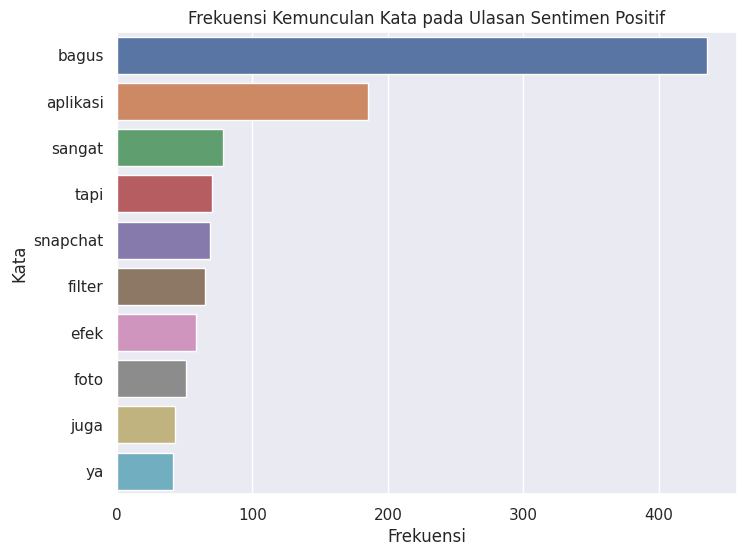

In [50]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [51]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        436
aplikasi        185
  sangat         78
    tapi         70
snapchat         69
  filter         65
    efek         58
    foto         51
    juga         43
      ya         41


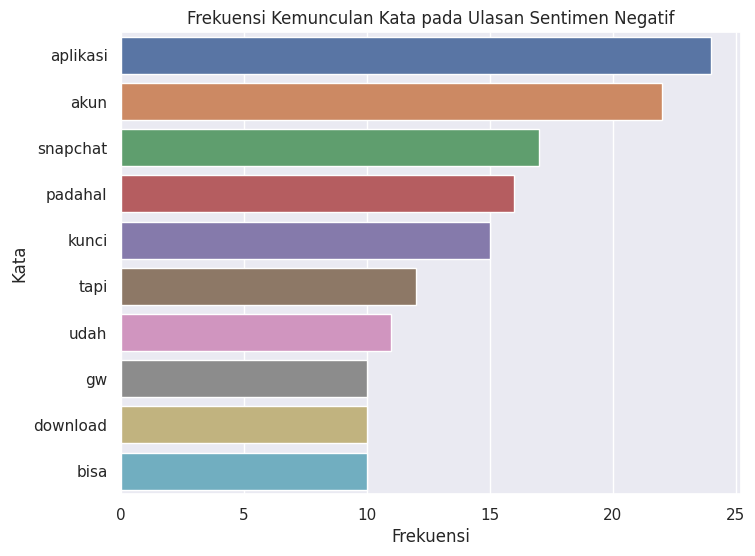

In [52]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [53]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi         24
    akun         22
snapchat         17
 padahal         16
   kunci         15
    tapi         12
    udah         11
      gw         10
download         10
    bisa         10


In [54]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,690
1,87


# **Transormation & Data Preparation**

In [55]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [57]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

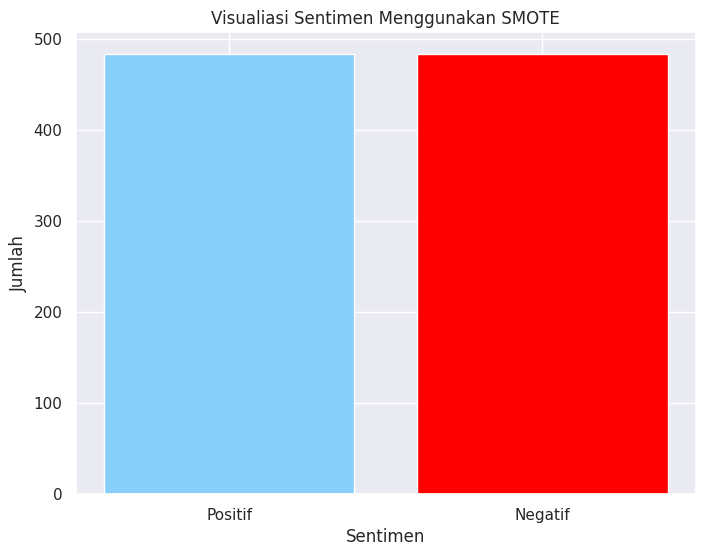

In [58]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [59]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [61]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [62]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8931623931623932

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.97      0.91      0.94       207
     Negatif       0.53      0.78      0.63        27

    accuracy                           0.89       234
   macro avg       0.75      0.84      0.78       234
weighted avg       0.92      0.89      0.90       234



In [63]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[188  19]
 [  6  21]]

True Positives (TP) =  188

True Negatives (TN) =  21

False Positives (FP) =  19

False Negatives (FN) =  6

Accuracy =  0.8931623931623932


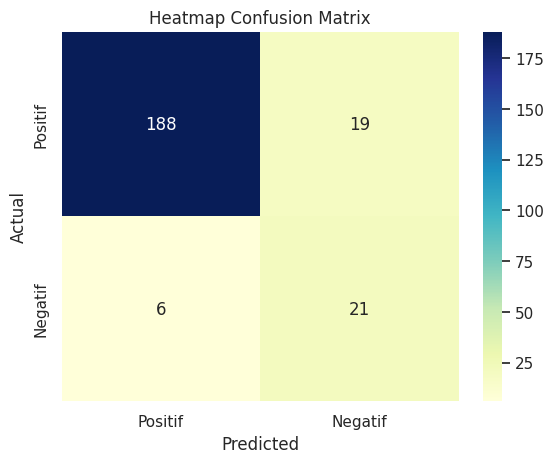

In [64]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [65]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [66]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8932


In [67]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1068


# **Testing**

In [68]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Tiba-tiba akun terkunci tanpa sebab, dan tidak ada solusi untuk mengenbalikan akun. Dengan alasan melanggar paduan komunitas. Perasaan ga ngapa²in deh. Tolong diberi solusi. Sudah 7 kali buat akun baru. Padahal juga ga ada yg aneh² bisa²nya hilang terus
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 97.70%
Probabilitas: 97.69859800459001 %


In [70]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Aplikasinya yg SANGAT RECOMMENDED UNTUK KALIAN YANG SUKA BELAJAR BAHASA INGGRIS + PENGEN NYARI SAHABAT PENA DARI LUAR NEGRI 👍🏻 . Thank you SnapChat 😊 .... I get many new friends because of you 😘 ... Cuma mungkin user-interface nya masih sedikit membingungkan bagi yang belom biasa
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 62.25%
Probabilitas: 62.24845610021411 %


In [ ]:
# Menyimpan Model

import pickle

# Misalnya model Anda disimpan dalam variabel bernama 'model'
with open('sentiment_model_NB.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# Load Model
# with open('sentiment_model.pkl', 'rb') as file:
#     model = pickle.load(file)


In [ ]:
import os

file_path = '/content/sentiment_model_NB.pkl'
file_size = os.path.getsize(file_path)

print(f"Ukuran file: {file_size} bytes")



Ukuran file: 292506326 bytes
